In [34]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import os
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates




In [35]:
df = pd.read_csv(r'C:\Users\dkris\Downloads\Country-data.csv')
df.set_index('country', inplace=True)
df = df.apply(lambda x: x.astype('float64'))

In [44]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(df)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=df.index)
memb

C:\Users\dkris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dkris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


country
Afghanistan            1
Albania                1
Algeria                6
Angola                 1
Antigua and Barbuda    6
                      ..
Vanuatu                1
Venezuela              6
Vietnam                1
Yemen                  1
Zambia                 1
Length: 167, dtype: int32

In [37]:
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  Brunei, Kuwait, Singapore, United Arab Emirates
1 :  Afghanistan, Albania, Angola, Armenia, Bangladesh, Belize, Benin, Bhutan, Bolivia, Bosnia and Herzegovina, Burkina Faso, Burundi, Cambodia, Cameroon, Cape Verde, Central African Republic, Chad, China, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Ecuador, Egypt, El Salvador, Eritrea, Fiji, Gambia, Georgia, Ghana, Guatemala, Guinea, Guinea-Bissau, Guyana, Haiti, India, Indonesia, Jamaica, Jordan, Kenya, Kiribati, Kyrgyz Republic, Lao, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Micronesia, Fed. Sts., Moldova, Mongolia, Morocco, Mozambique, Myanmar, Namibia, Nepal, Niger, Nigeria, Pakistan, Paraguay, Peru, Philippines, Rwanda, Samoa, Senegal, Sierra Leone, Solomon Islands, Sri Lanka, St. Vincent and the Grenadines, Sudan, Tajikistan, Tanzania, Timor-Leste, Togo, Tonga, Tunisia, Turkmenistan, Uganda, Ukraine, Uzbekistan, Vanuatu, Vietnam, Yemen, Zambia
2 :  Bahamas, Bahrain, Cyprus, Czech Republic, Equatorial G

   child_mort  exports  health  imports      income  inflation  life_expec  \
0       8.175  102.950   3.272   74.000   71375.000     10.088      78.625   
1      62.566   30.991   6.128   46.076    4392.506      9.778      65.006   
2      13.406   57.247   7.322   52.171   31947.059      5.470      77.365   
3       9.000   62.300   1.810   23.800  125000.000      6.980      79.500   
4       4.294   43.144  10.766   40.131   41125.000      1.091      80.806   
5       3.500   92.900   9.583   74.600   69833.333      3.296      81.500   
6      17.663   44.261   6.754   44.917   16309.756      7.335      73.432   

   total_fer       gdpp  
0      1.768  38850.000  
1      3.872   1998.165  
2      2.086  23217.647  
3      2.070  70300.000  
4      1.796  46112.500  
5      1.700  89133.333  
6      2.068   9013.902  


(-0.5, 7.5)

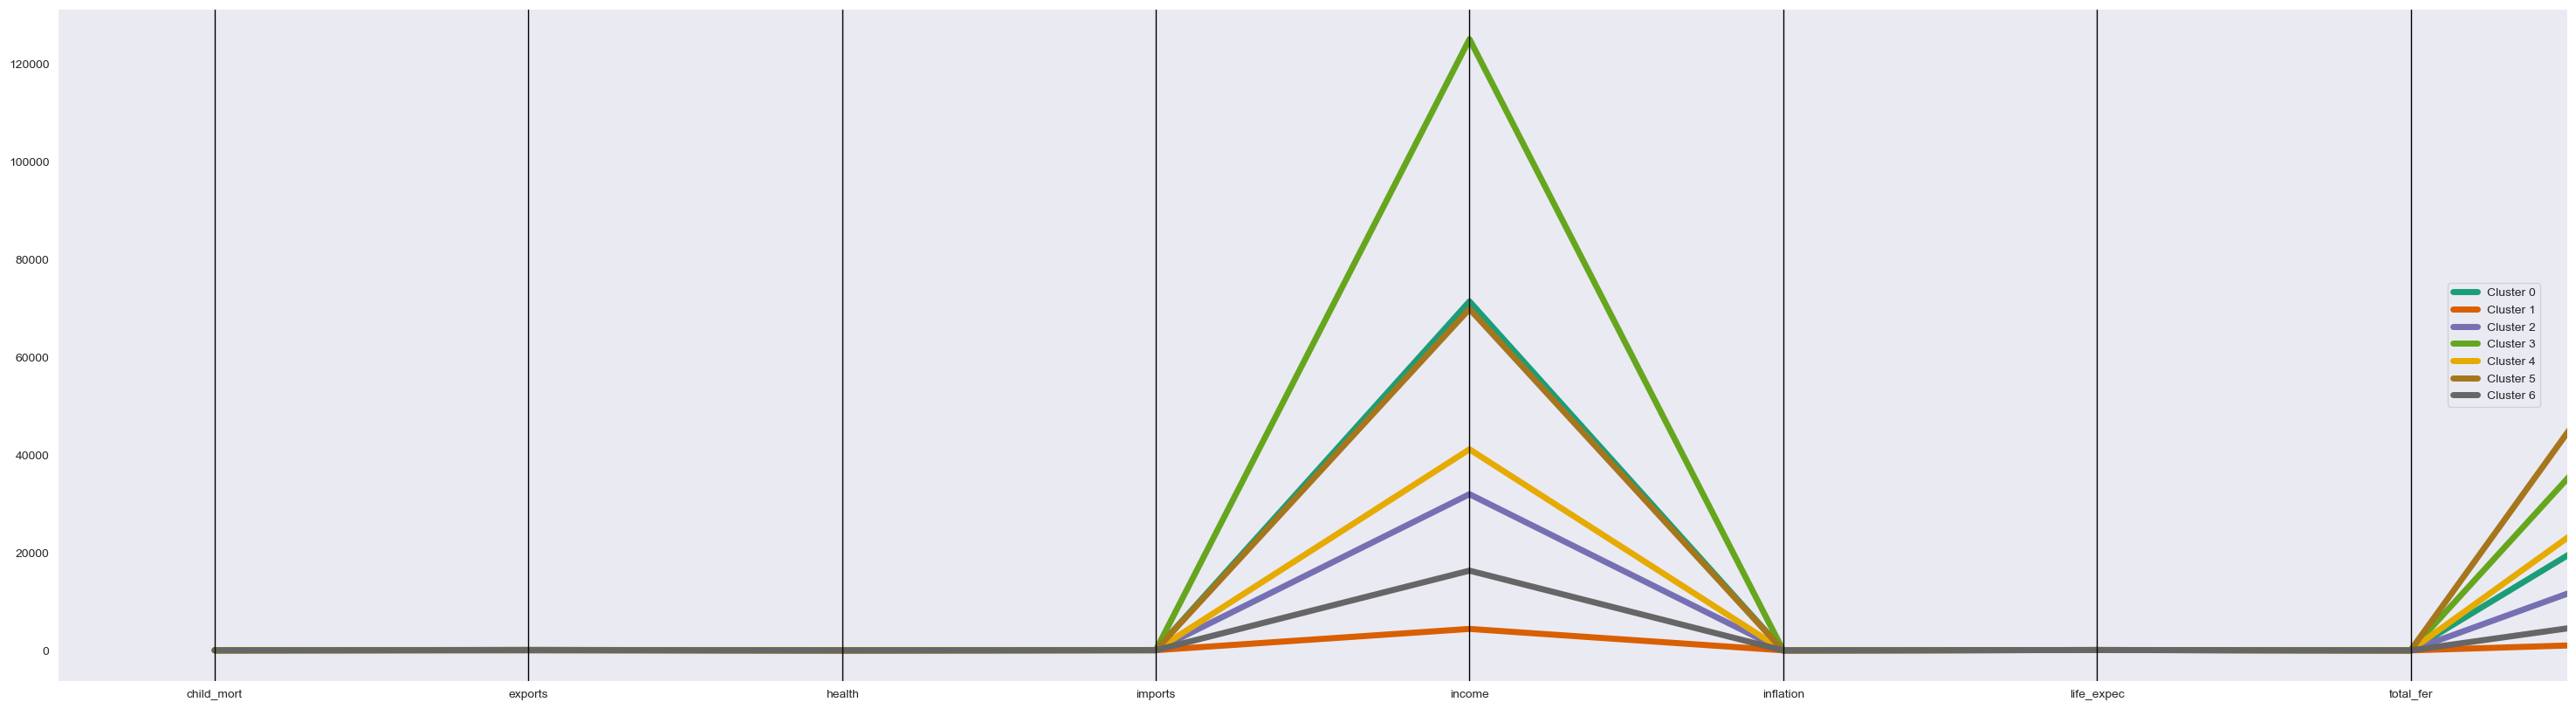

In [38]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)
pd.set_option('display.precision', 3)
print(centroids)
pd.set_option('display.precision', 6)

centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
fig=plt.figure(figsize=(10,10),facecolor='white')
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)

In [39]:
# Normalized distance
df_norm = df.apply(preprocessing.scale, axis=0)

kmeans = KMeans(n_clusters=10, random_state=0).fit(df_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

C:\Users\dkris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dkris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0 :  Algeria, Azerbaijan, Bangladesh, Bolivia, Congo, Rep., Egypt, Eritrea, Gabon, Ghana, India, Indonesia, Iraq, Kazakhstan, Kenya, Lao, Madagascar, Mongolia, Myanmar, Nepal, Pakistan, Sri Lanka, Sudan, Uzbekistan, Venezuela, Yemen
1 :  Australia, Austria, Belgium, Canada, Denmark, Finland, France, Germany, Greece, Iceland, Israel, Italy, Japan, Netherlands, New Zealand, Norway, Portugal, Spain, Sweden, Switzerland, United Kingdom, United States
2 :  Armenia, Belize, Bhutan, Cambodia, Cape Verde, Fiji, Grenada, Guatemala, Guyana, Jamaica, Jordan, Kyrgyz Republic, Morocco, Paraguay, Philippines, Samoa, St. Vincent and the Grenadines, Tajikistan, Tonga, Tunisia, Turkmenistan, Vanuatu
3 :  Afghanistan, Angola, Benin, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Cote d'Ivoire, Equatorial Guinea, Gambia, Guinea, Guinea-Bissau, Haiti, Malawi, Mali, Mauritania, Mozambique, Niger, Senegal, Sierra Leone, Tanzania, Timor-Leste, Togo, Uganda, Zambia

   child_mort  exports  health  imports  income  inflation  life_expec  \
0       0.272   -0.393  -0.893   -0.693  -0.517      0.789      -0.363   
1      -0.845   -0.117   1.372   -0.449   1.190     -0.592       1.168   
2      -0.230   -0.045  -0.544    0.386  -0.547     -0.287       0.013   
3       1.747   -0.485  -0.174   -0.234  -0.739      0.184      -1.441   
4       2.281   -0.578  -0.637   -1.222  -0.624      9.130      -1.134   
5      -0.849    4.936  -0.008    4.548   2.440     -0.504       1.227   
6      -0.701    0.891  -1.603   -0.807   3.978      0.365       0.870   
7       0.448   -0.349   1.279    0.889  -0.637     -0.223      -1.197   
8      -0.708    0.978  -0.277    0.718   0.478     -0.284       0.611   
9      -0.593   -0.342   0.285   -0.375  -0.147     -0.180       0.537   

   total_fer   gdpp  
0      0.270 -0.545  
1     -0.761  1.768  
2     -0.057 -0.526  
3      1.734 -0.628  
4      1.916 -0.582  
5     -1.039  2.441  
6     -0.602  1.919  
7      0.

(-0.5, 7.5)

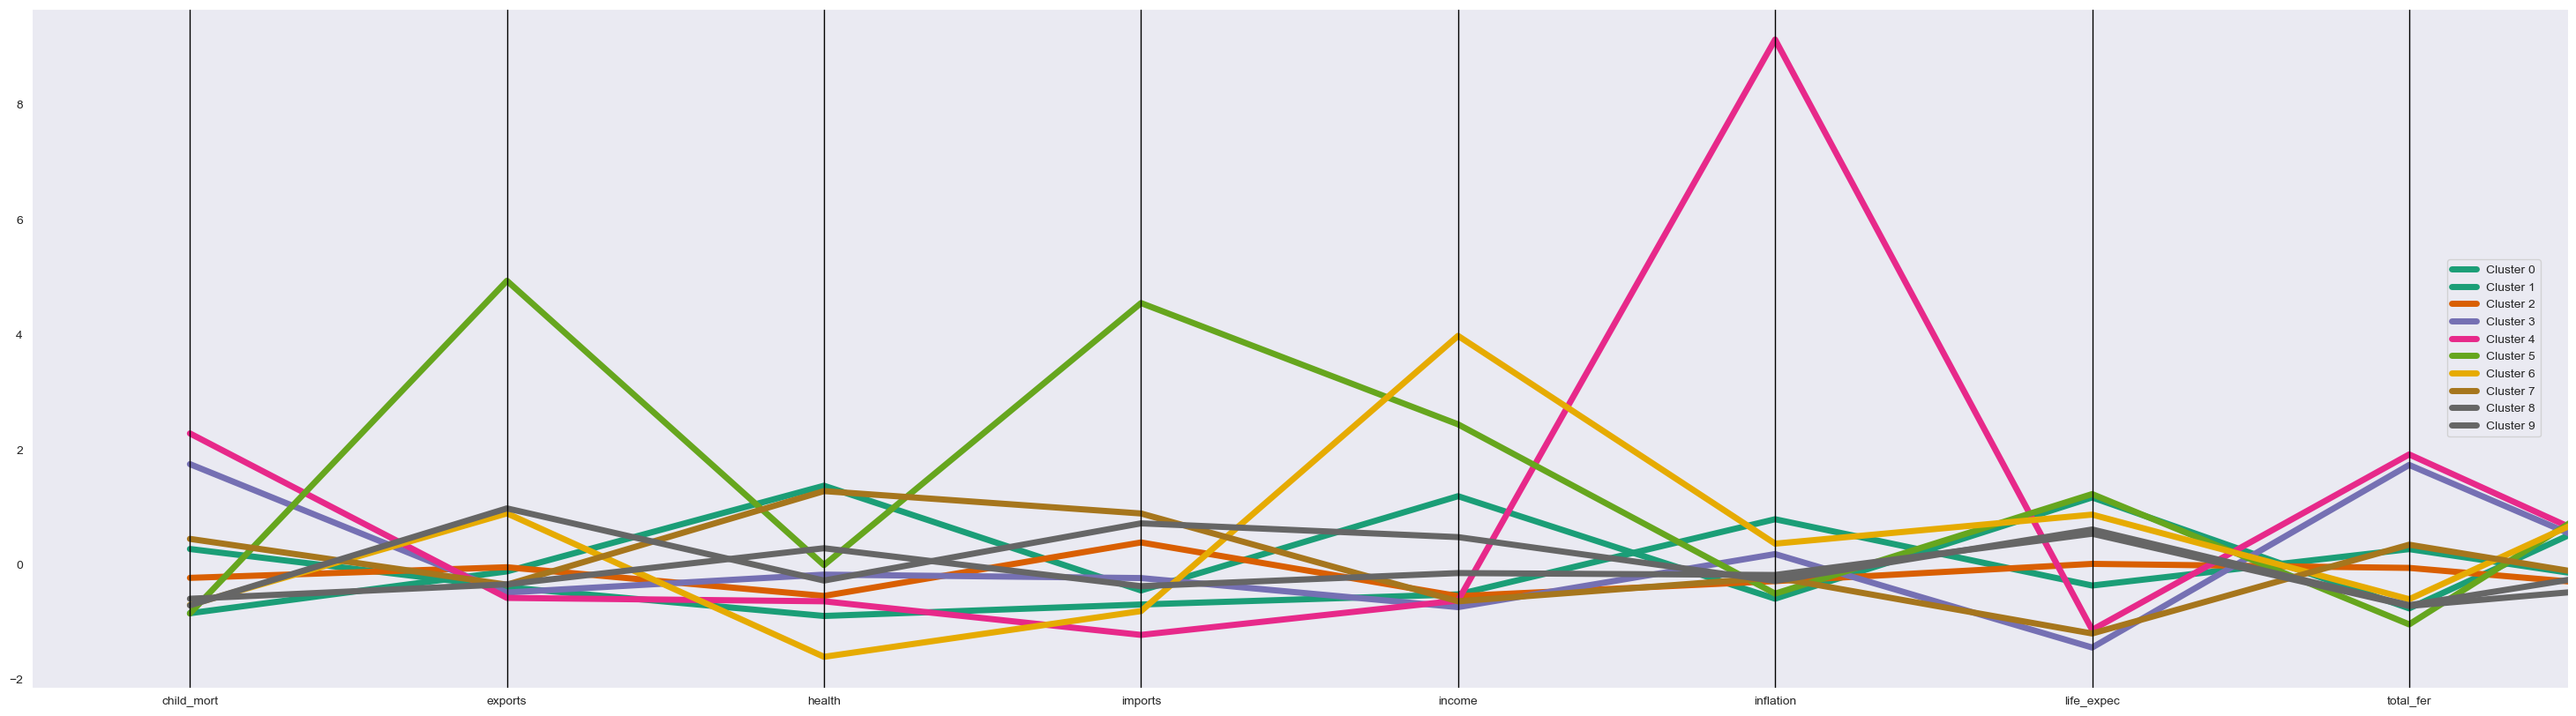

In [40]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)
pd.set_option('display.precision', 3)
print(centroids)
pd.set_option('display.precision', 6)

centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
fig=plt.figure(figsize=(10,10),facecolor='white')
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)

C:\Users\dkris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dkris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dkris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dkris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

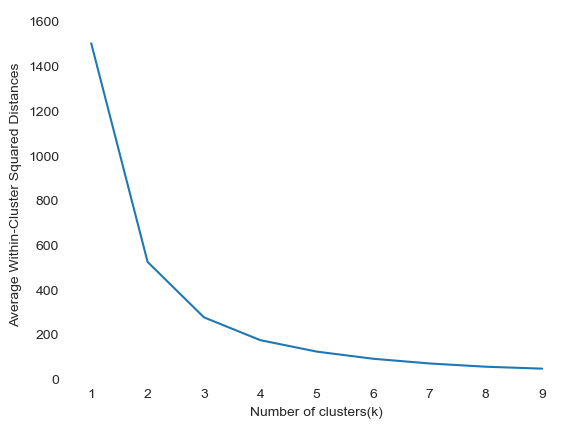

In [41]:
fig, ax = plt.subplots(facecolor='white')
inertia = []
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 10), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia', ax=ax)
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
ax.patch.set_facecolor('white')
plt.show()

In [42]:
# took no of clusters = 3 , by using the elbow rule.
# buy taking n = 3 we can divide the countries as need_help, may_need_help, no need of help.
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

C:\Users\dkris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dkris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0 :  Albania, Algeria, Antigua and Barbuda, Argentina, Armenia, Azerbaijan, Bahamas, Bangladesh, Barbados, Belarus, Belize, Bhutan, Bolivia, Bosnia and Herzegovina, Brazil, Bulgaria, Cambodia, Cape Verde, Chile, China, Colombia, Costa Rica, Croatia, Dominican Republic, Ecuador, Egypt, El Salvador, Estonia, Fiji, Georgia, Grenada, Guatemala, Guyana, Hungary, India, Indonesia, Iran, Jamaica, Jordan, Kazakhstan, Kyrgyz Republic, Latvia, Lebanon, Libya, Lithuania, Macedonia, FYR, Malaysia, Maldives, Mauritius, Micronesia, Fed. Sts., Moldova, Mongolia, Montenegro, Morocco, Myanmar, Nepal, Oman, Panama, Paraguay, Peru, Philippines, Poland, Romania, Russia, Samoa, Saudi Arabia, Serbia, Seychelles, Solomon Islands, Sri Lanka, St. Vincent and the Grenadines, Suriname, Tajikistan, Thailand, Tonga, Tunisia, Turkey, Turkmenistan, Ukraine, Uruguay, Uzbekistan, Vanuatu, Venezuela, Vietnam
1 :  Afghanistan, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Como

   child_mort  exports  health  imports  income  inflation  life_expec  \
0      -0.406   -0.032  -0.224    0.024  -0.252     -0.017       0.255   
1       1.360   -0.438  -0.156   -0.189  -0.687      0.402      -1.282   
2      -0.827    0.645   0.727    0.191   1.484     -0.485       1.080   

   total_fer   gdpp  
0     -0.424 -0.354  
1      1.365 -0.604  
2     -0.792  1.616  


(-0.5, 7.5)

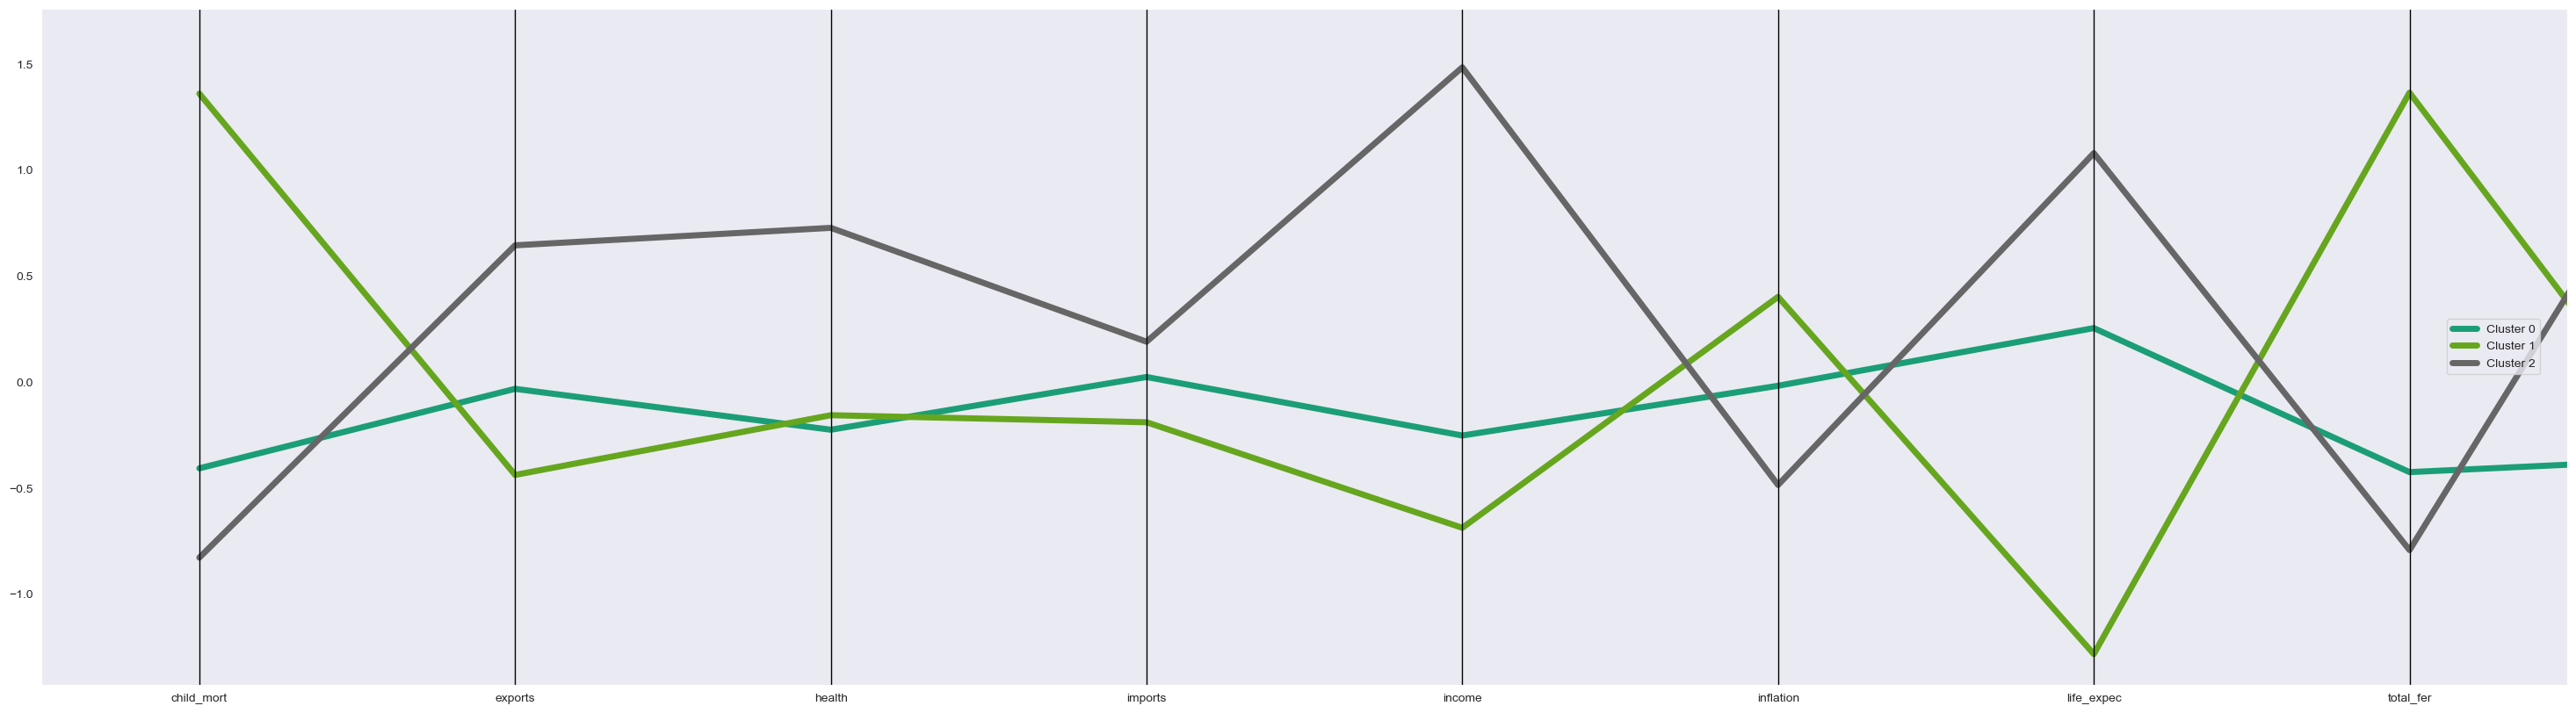

In [43]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)
pd.set_option('display.precision', 3)
print(centroids)
pd.set_option('display.precision', 6)

centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
fig=plt.figure(figsize=(10,10),facecolor='white')
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)

In [ ]:
# cluster 0 represents countries that may need help
# cluster 1 represents countries that need help
# closter 2 represents countries that do not need help